<a href="https://colab.research.google.com/github/csargin/Melbourne-Housing-Market/blob/main/endtoendmlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})

## Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/My Drive/inzva/Melbourne_housing_FULL.csv")
data.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [ ]:
print("Shape:", data.shape)
print("Size:", data.size)

Shape: (34857, 21)
Size: 731997


In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## Exploratory Data Analysis & Preprocessing The Data

In [ ]:
data.describe().T

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Lattitude      26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

### Convert objects to categorical values


In [ ]:
# Convert objects to categorical variables
object_columns = data.select_dtypes("object").columns

# Car and Bathroom are integer but also categorical values
object_columns = np.append(object_columns,"Car")
object_columns = np.append(object_columns,"Bathroom")

print(object_columns)

['Suburb' 'Address' 'Type' 'Method' 'SellerG' 'Date' 'CouncilArea'
 'Regionname' 'Car' 'Bathroom']


In [ ]:
for colname in object_columns:
    data[colname] = data[colname].astype('category')

# Check it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  category
 12  Car            26129 non-null  category
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

### Removing Duplicates


In [ ]:
# Check for duplicate data
duplicate = data.duplicated()
print(duplicate.sum())

1


In [ ]:
data[duplicate]

Suburb        Address  Rooms Type  Price Method SellerG  \
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car Landsize  \
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0    405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15858  Eastern Metropolitan        4973.0  

[1 rows x 21 columns]

In [ ]:
data.drop_duplicates(inplace=True, keep="first")
data.duplicated().sum()

0

### Outliers Detection

In [ ]:
# Check min, max and mean of values to ensure it makes sense
data.describe().T

count          mean            std          min  \
Rooms          34856.0  3.031013e+00       0.969947      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34855.0  1.118481e+01       6.788952      0.00000   
Postcode       34855.0  3.116062e+03     109.025437   3000.00000   
Bedroom2       26639.0  3.084650e+00       0.980708      0.00000   
Landsize       23046.0  5.936072e+02    3398.915462      0.00000   
BuildingArea   13741.0  1.602516e+02     401.281270      0.00000   
YearBuilt      15550.0  1.965288e+03      37.328340   1196.00000   
Lattitude      26880.0 -3.781063e+01       0.090281    -38.19043   
Longtitude     26880.0  1.450018e+02       0.120167    144.42379   
Propertycount  34853.0  7.572963e+03    4428.131940     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775409e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

In [ ]:
# Landsize and Build Area cannot be 0 or negative. Convert them to nan
data.loc[data["Landsize"] <= 0, "Landsize"] = np.nan
data.loc[data["BuildingArea"] <= 0, "BuildingArea"] = np.nan

In [ ]:
# Remove false YearBuilt (Melbourne Founded 1835)
data.drop(data.loc[data['YearBuilt'] < 1835].index, inplace=True)

In [ ]:
# Adding feature for house age
data['Age'] = 2022 - data['YearBuilt']
data.drop(data.loc[data["Age"] < 0].index, inplace=True)

In [ ]:
data.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Car Landsize BuildingArea  YearBuilt  \
0  3/09/2016       2.5    3067.0  ...  1.0    126.0          NaN        NaN   
1  3/12/2016       2.5    3067.0  ...  1.0    202.0          NaN        NaN   
2  4/02/2016       2.5    3067.0  ...  0.0    156.0         79.0     1900.0   
3  4/02/2016       2.5    3067.0  ...  1.0      NaN          NaN        NaN   
4  4/03/2017       2.5    3067.0  ...  0.0    134.0        150.0     1900.0   

          CouncilArea  Lattitude Longtitude             Regionname  \
0  Yarra City Council   -37.8014   144.9958  Northern Metropolitan   
1  Yarra City Council   -37.7996   144.9984  Northern Metropolitan   
2  Yarra City Council   -37.8079   144.9934  Northern Metropolitan   
3  Yarra City Council   -37.8114   145.0116  Northern Metropolitan   
4  Yarra City Council   -37.8093   144.9944  Northern Metropolitan   

   Propertycount    Age  
0         4019.0    NaN  
1         4019.0    NaN  
2         4019.0  122.0  
3         4019.0    NaN  
4         4019.0  122.0  

[5 rows x 22 columns]

In [ ]:
data = data.drop(['YearBuilt'], axis = 1)

In [ ]:
data.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0    126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0    202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0    156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0      NaN           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0    134.0         150.0   

          CouncilArea Lattitude  Longtitude             Regionname  \
0  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount    Age  
0        4019.0    NaN  
1        4019.0    NaN  
2        4019.0  122.0  
3        4019.0    NaN  
4        4019.0  122.0  

[5 rows x 21 columns]

### Outliers Detection with z score


In [ ]:
numerical_columns = data.select_dtypes("float64", "int64").columns # finds the integer and float columns in the datasets

In [ ]:
numerical_columns

Index(['Price', 'Distance', 'Postcode', 'Bedroom2', 'Landsize', 'BuildingArea',
       'Lattitude', 'Longtitude', 'Propertycount', 'Age'],
      dtype='object')

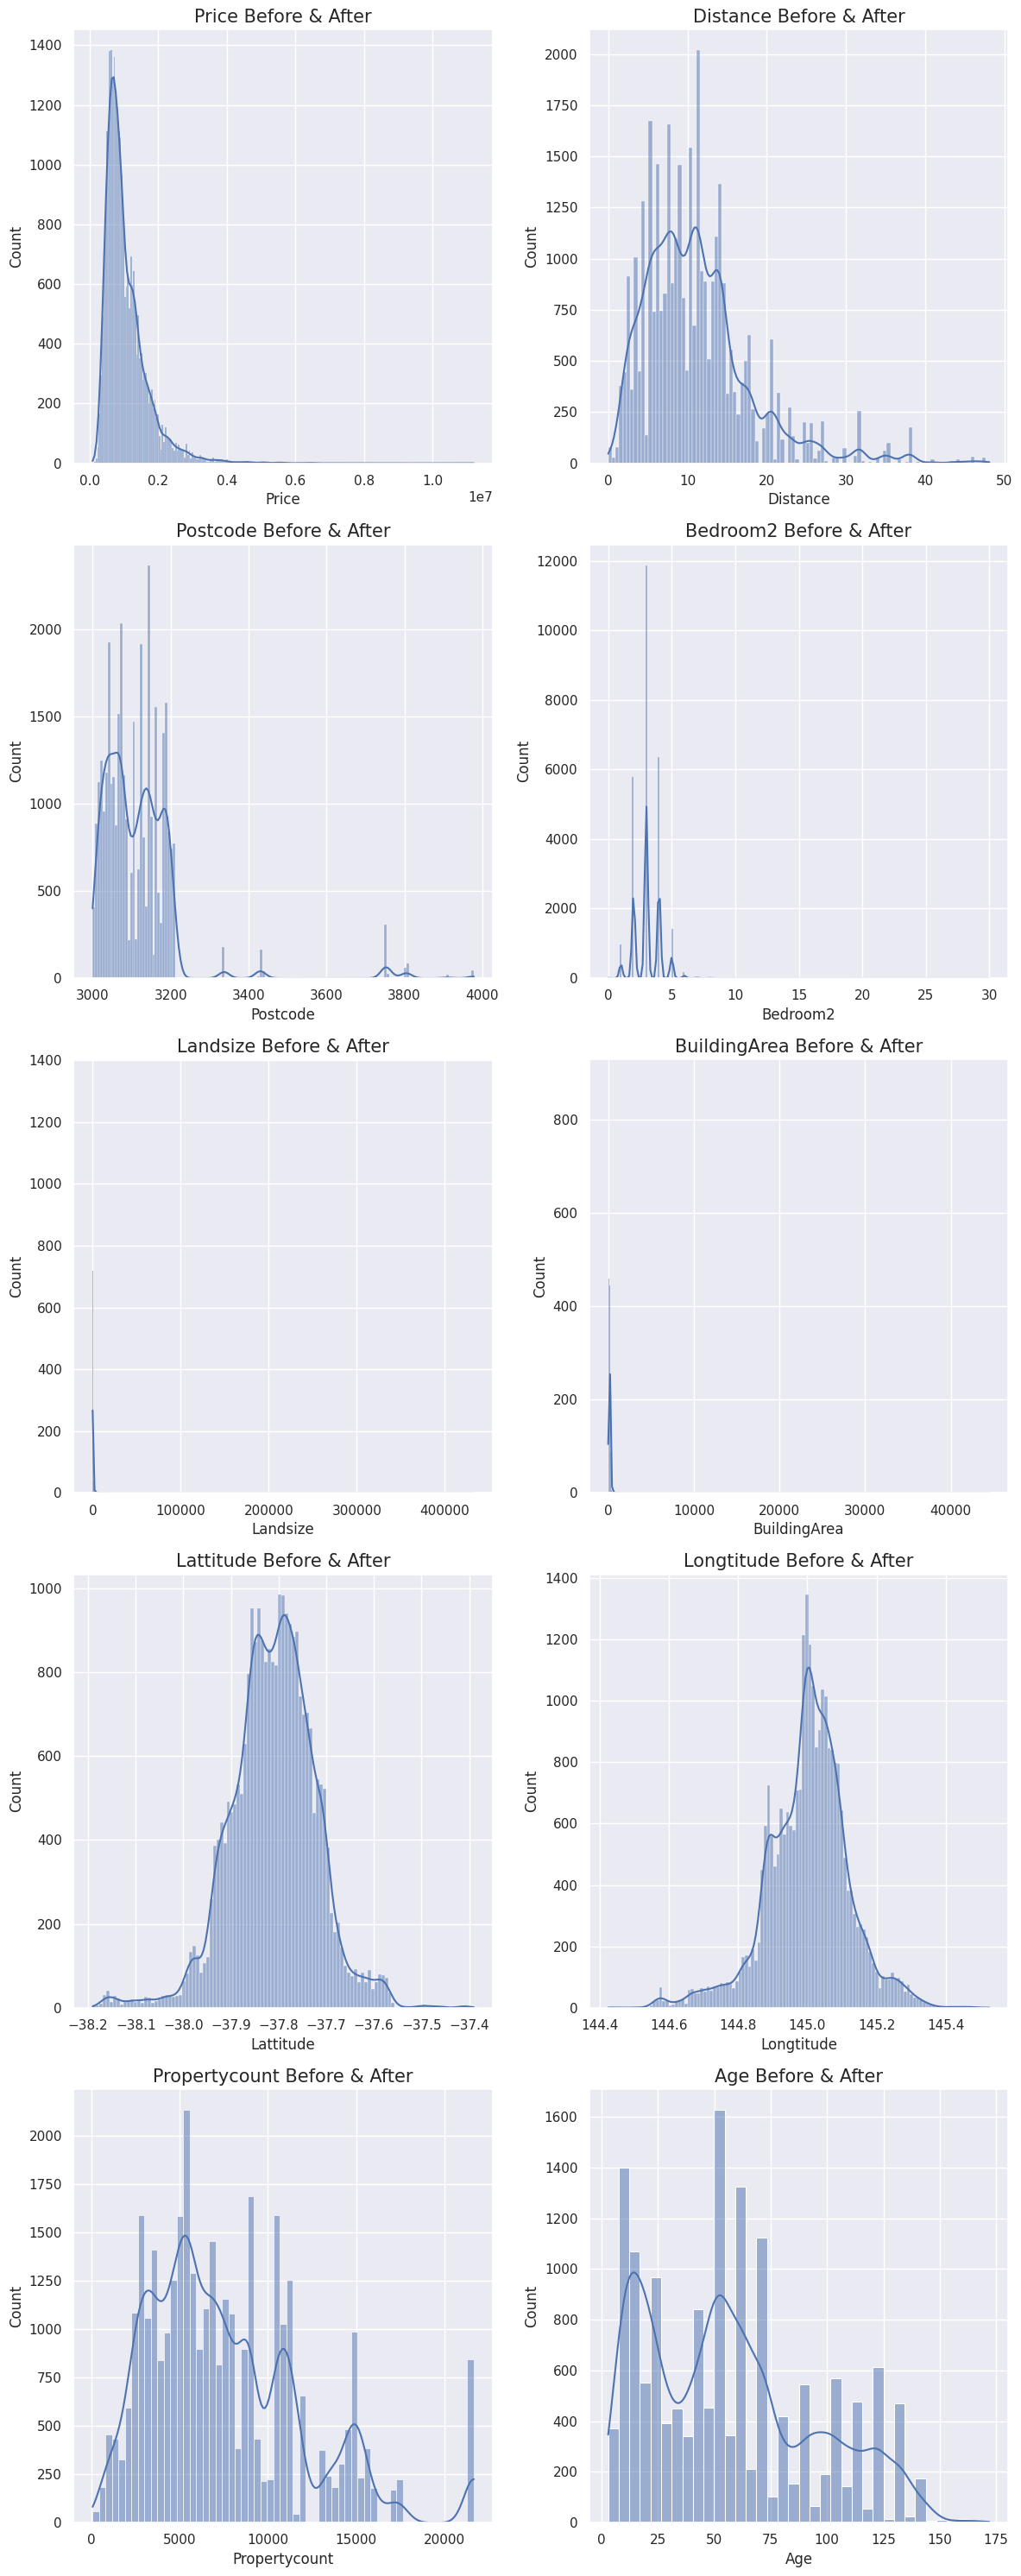

In [ ]:
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  # Create a 2-column grid

# Create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

for column, ax in zip(numerical_columns, axes.flat):
    # Your existing code for handling outliers and imputation
    sns.histplot(data[column], ax=ax, kde=True)

    max_value = (3 * data[column].std()) + data[column].mean()
    min_value = -((3 * data[column].std()) + data[column].mean())

    mean = data.loc[(data[column] > min_value) & (data[column] < max_value), column].mean()

    if not np.isnan(mean):
        data.loc[(data[column] < min_value) | (data[column] > max_value), column] = mean
        data[column].fillna(mean, inplace=True)
    else:
        data[column].fillna(data[column].mean(), inplace=True)

    ax.set_title(f"{column} Before & After", fontsize=15)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [ ]:
data.shape

(34851, 21)

### Handling missing values

In [ ]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom         8226
Car              8727
Landsize            0
BuildingArea        0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       0
Age                 0
dtype: int64

In [ ]:
# Percentage of Missings in each columns
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom         23.603340
Car              25.040888
Landsize          0.000000
BuildingArea      0.000000
CouncilArea       0.008608
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.008608
Propertycount     0.000000
Age               0.000000
dtype: float64

In [ ]:
# Imputation method for categorical variables (we cannot use z score for string values)
categorical_columns = data.select_dtypes("category")
categorical_columns

Suburb             Address Type Method        SellerG        Date  \
0      Abbotsford       68 Studley St    h     SS         Jellis   3/09/2016   
1      Abbotsford        85 Turner St    h      S         Biggin   3/12/2016   
2      Abbotsford     25 Bloomburg St    h      S         Biggin   4/02/2016   
3      Abbotsford  18/659 Victoria St    u     VB         Rounds   4/02/2016   
4      Abbotsford        5 Charles St    h     SP         Biggin   4/03/2017   
...           ...                 ...  ...    ...            ...         ...   
34852  Yarraville         13 Burns St    h     PI            Jas  24/02/2018   
34853  Yarraville       29A Murray St    h     SP        Sweeney  24/02/2018   
34854  Yarraville      147A Severn St    t      S            Jas  24/02/2018   
34855  Yarraville    12/37 Stephen St    h     SP  hockingstuart  24/02/2018   
34856  Yarraville    3 Tarrengower St    h     PI             RW  24/02/2018   

      Bathroom  Car               CouncilArea             Regionname  
0          1.0  1.0        Yarra City Council  Northern Metropolitan  
1          1.0  1.0        Yarra City Council  Northern Metropolitan  
2          1.0  0.0        Yarra City Council  Northern Metropolitan  
3          2.0  1.0        Yarra City Council  Northern Metropolitan  
4          2.0  0.0        Yarra City Council  Northern Metropolitan  
...        ...  ...                       ...                    ...  
34852      1.0  3.0  Maribyrnong City Council   Western Metropolitan  
34853      2.0  1.0  Maribyrnong City Council   Western Metropolitan  
34854      1.0  2.0  Maribyrnong City Council   Western Metropolitan  
34855      NaN  NaN  Maribyrnong City Council   Western Metropolitan  
34856      1.0  0.0  Maribyrnong City Council   Western Metropolitan  

[34851 rows x 10 columns]

In [ ]:
for column in categorical_columns:
  data[column] = data[column].fillna(data[column].mode().iloc[0])  # Put the most repeated value

In [ ]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
dtype: int64

### Data Visualization

#### Histogram in House Price

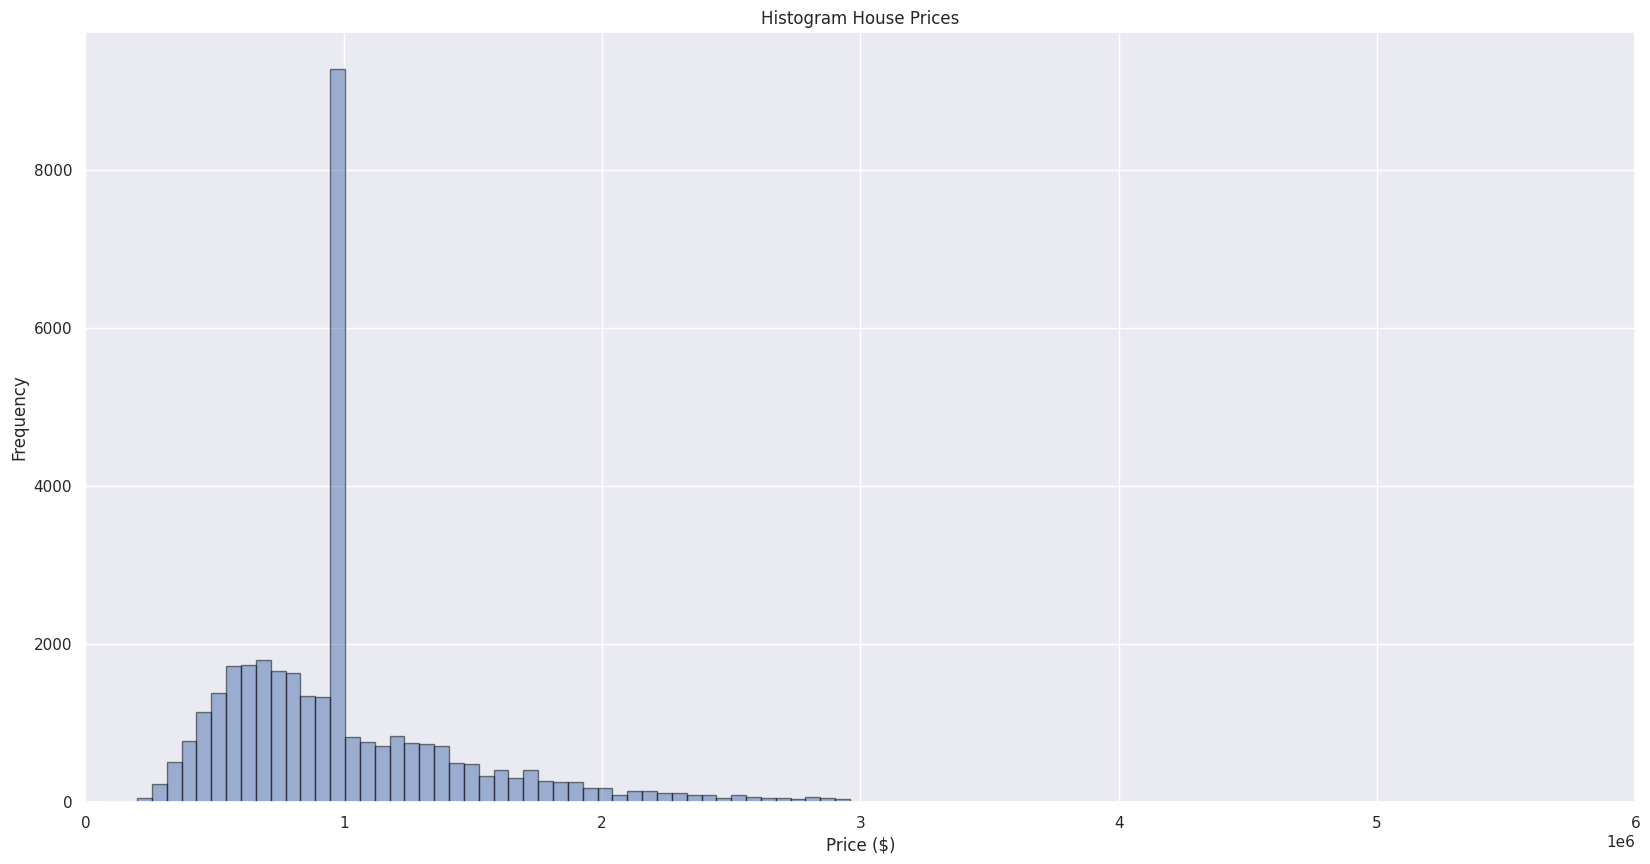

In [ ]:
# Build Histogram to visualise price distribution
num_bins = 50
n, bins, patches = plt.hist(data.Price, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Price ($)')
plt.xlim([0, 6000000])

plt.title ('Histogram House Prices')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34851 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34851 non-null  category
 1   Address        34851 non-null  category
 2   Rooms          34851 non-null  int64   
 3   Type           34851 non-null  category
 4   Price          34851 non-null  float64 
 5   Method         34851 non-null  category
 6   SellerG        34851 non-null  category
 7   Date           34851 non-null  category
 8   Distance       34851 non-null  float64 
 9   Postcode       34851 non-null  float64 
 10  Bedroom2       34851 non-null  float64 
 11  Bathroom       34851 non-null  category
 12  Car            34851 non-null  category
 13  Landsize       34851 non-null  float64 
 14  BuildingArea   34851 non-null  float64 
 15  CouncilArea    34851 non-null  category
 16  Lattitude      34851 non-null  float64 
 17  Longtitude     34851 non-null  

#### Seaborn PairPlot

In [ ]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Age'],
      dtype='object')

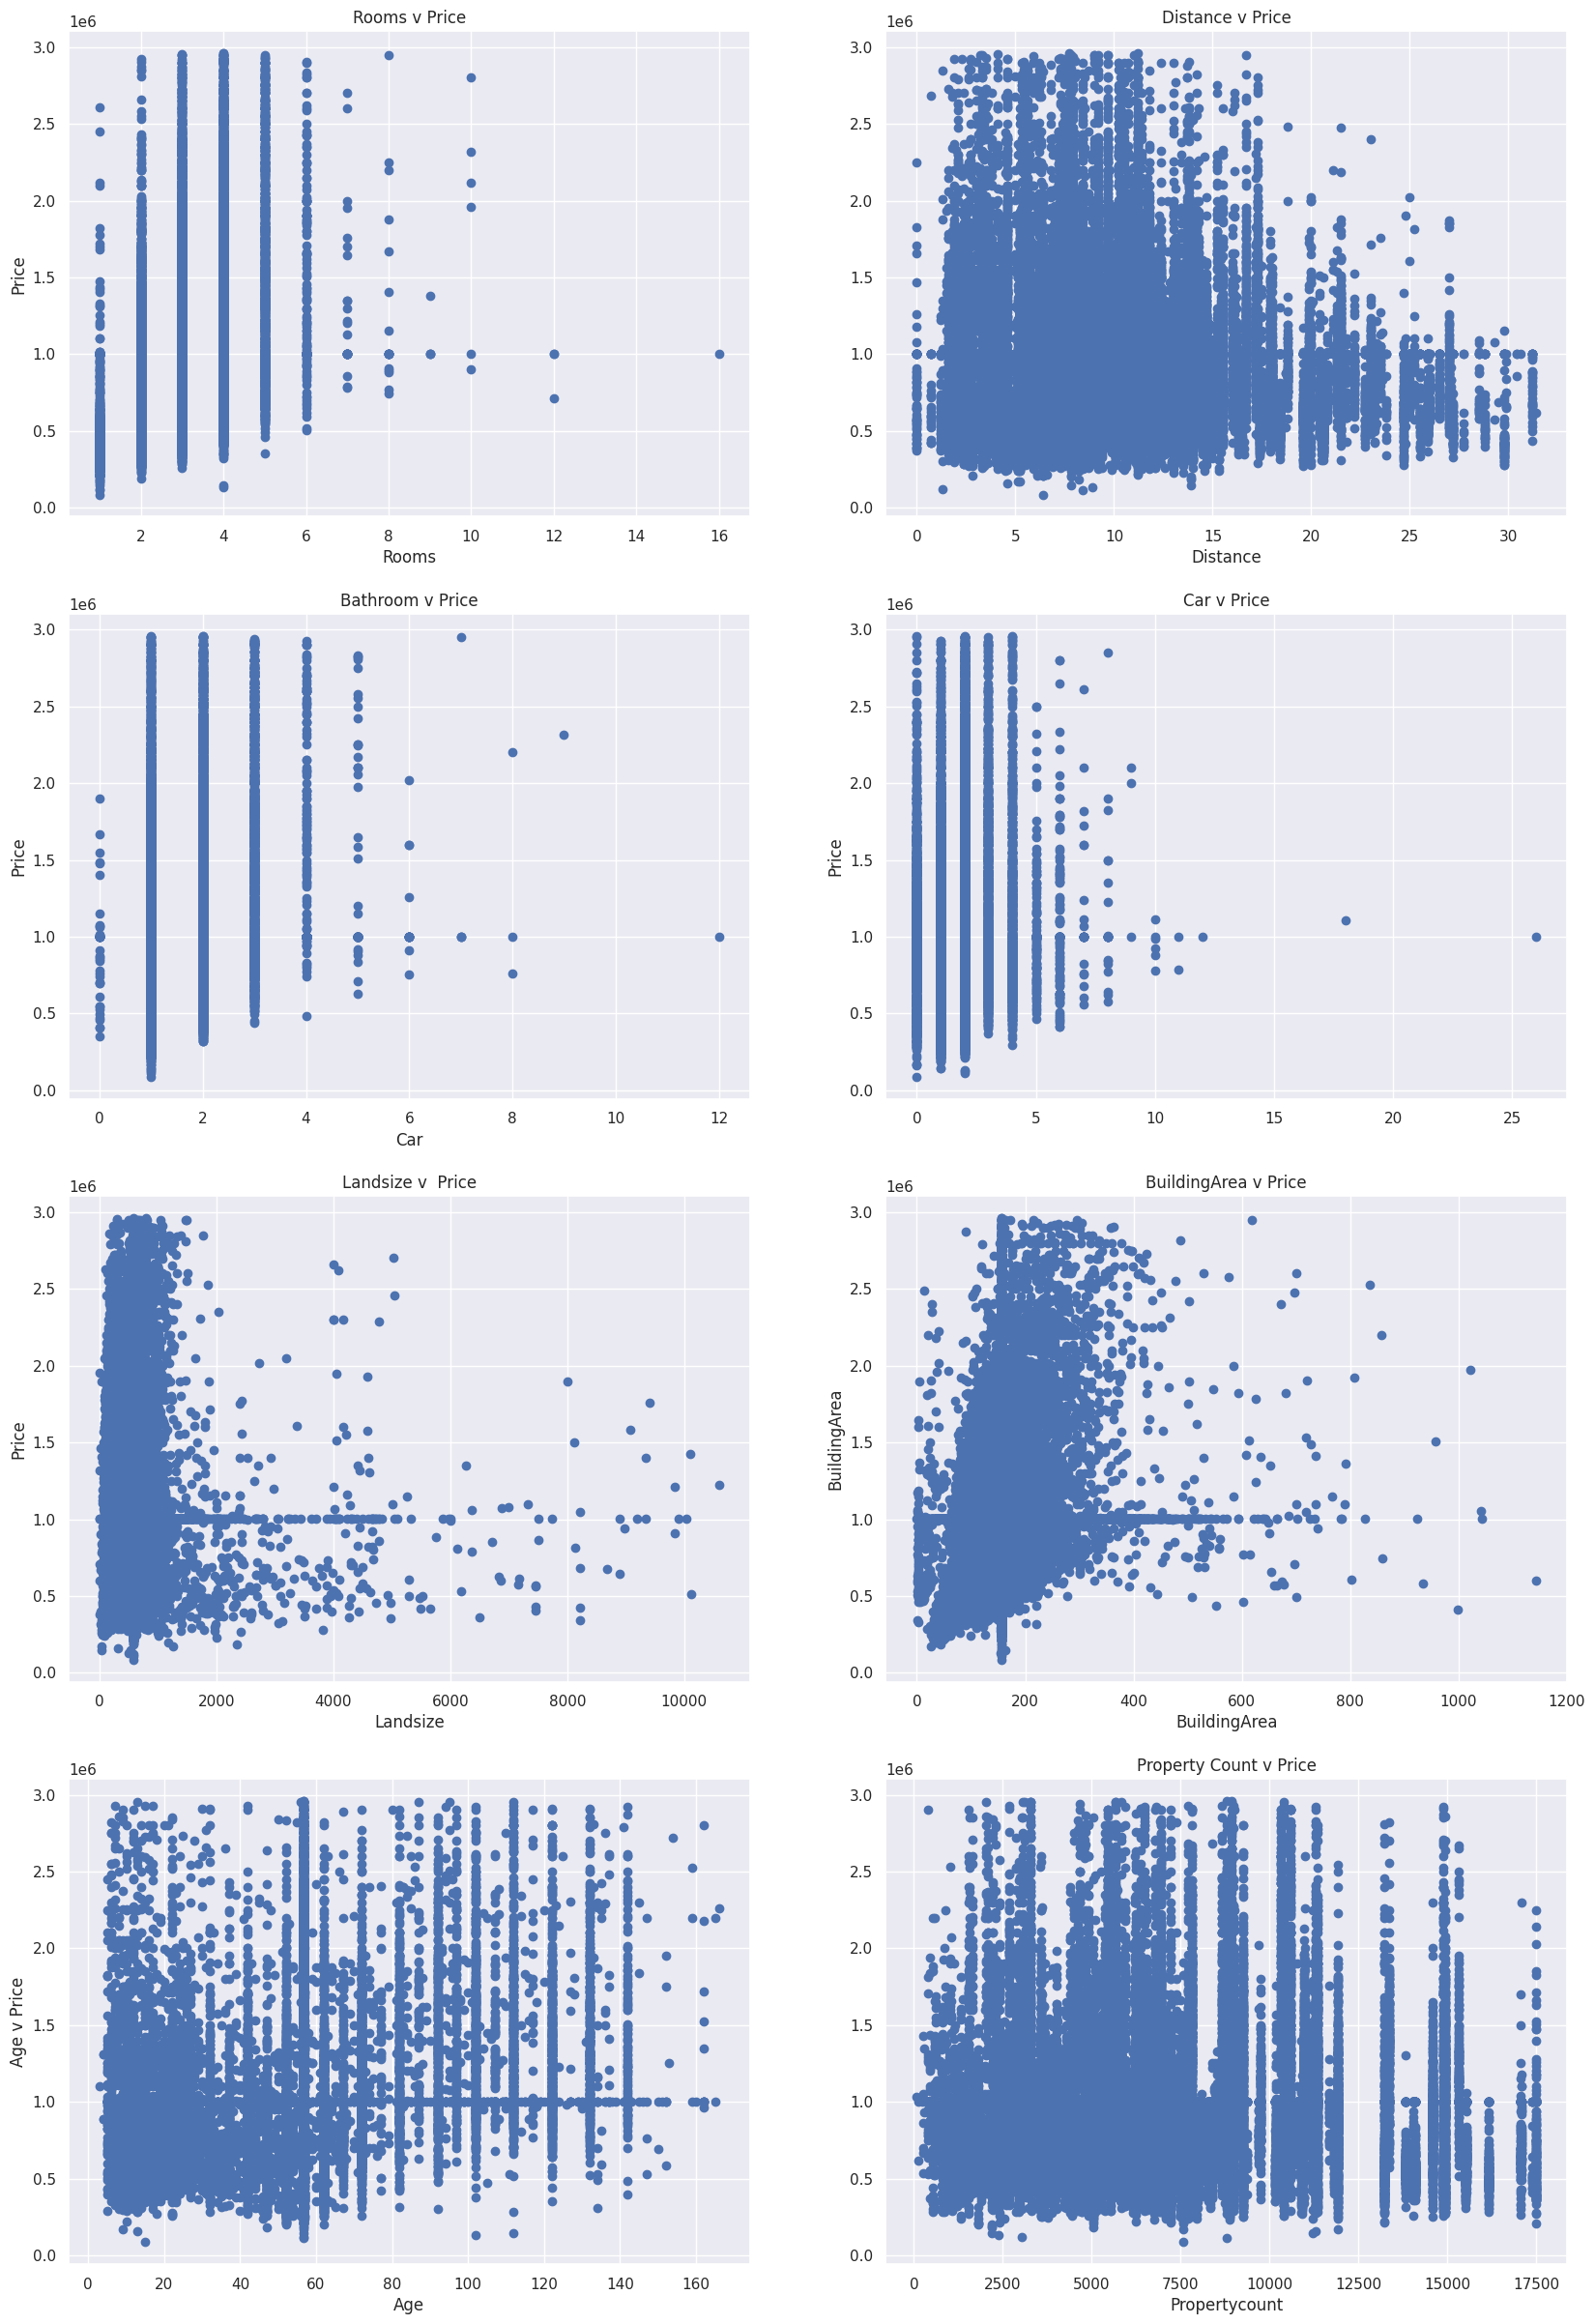

In [ ]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')
# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

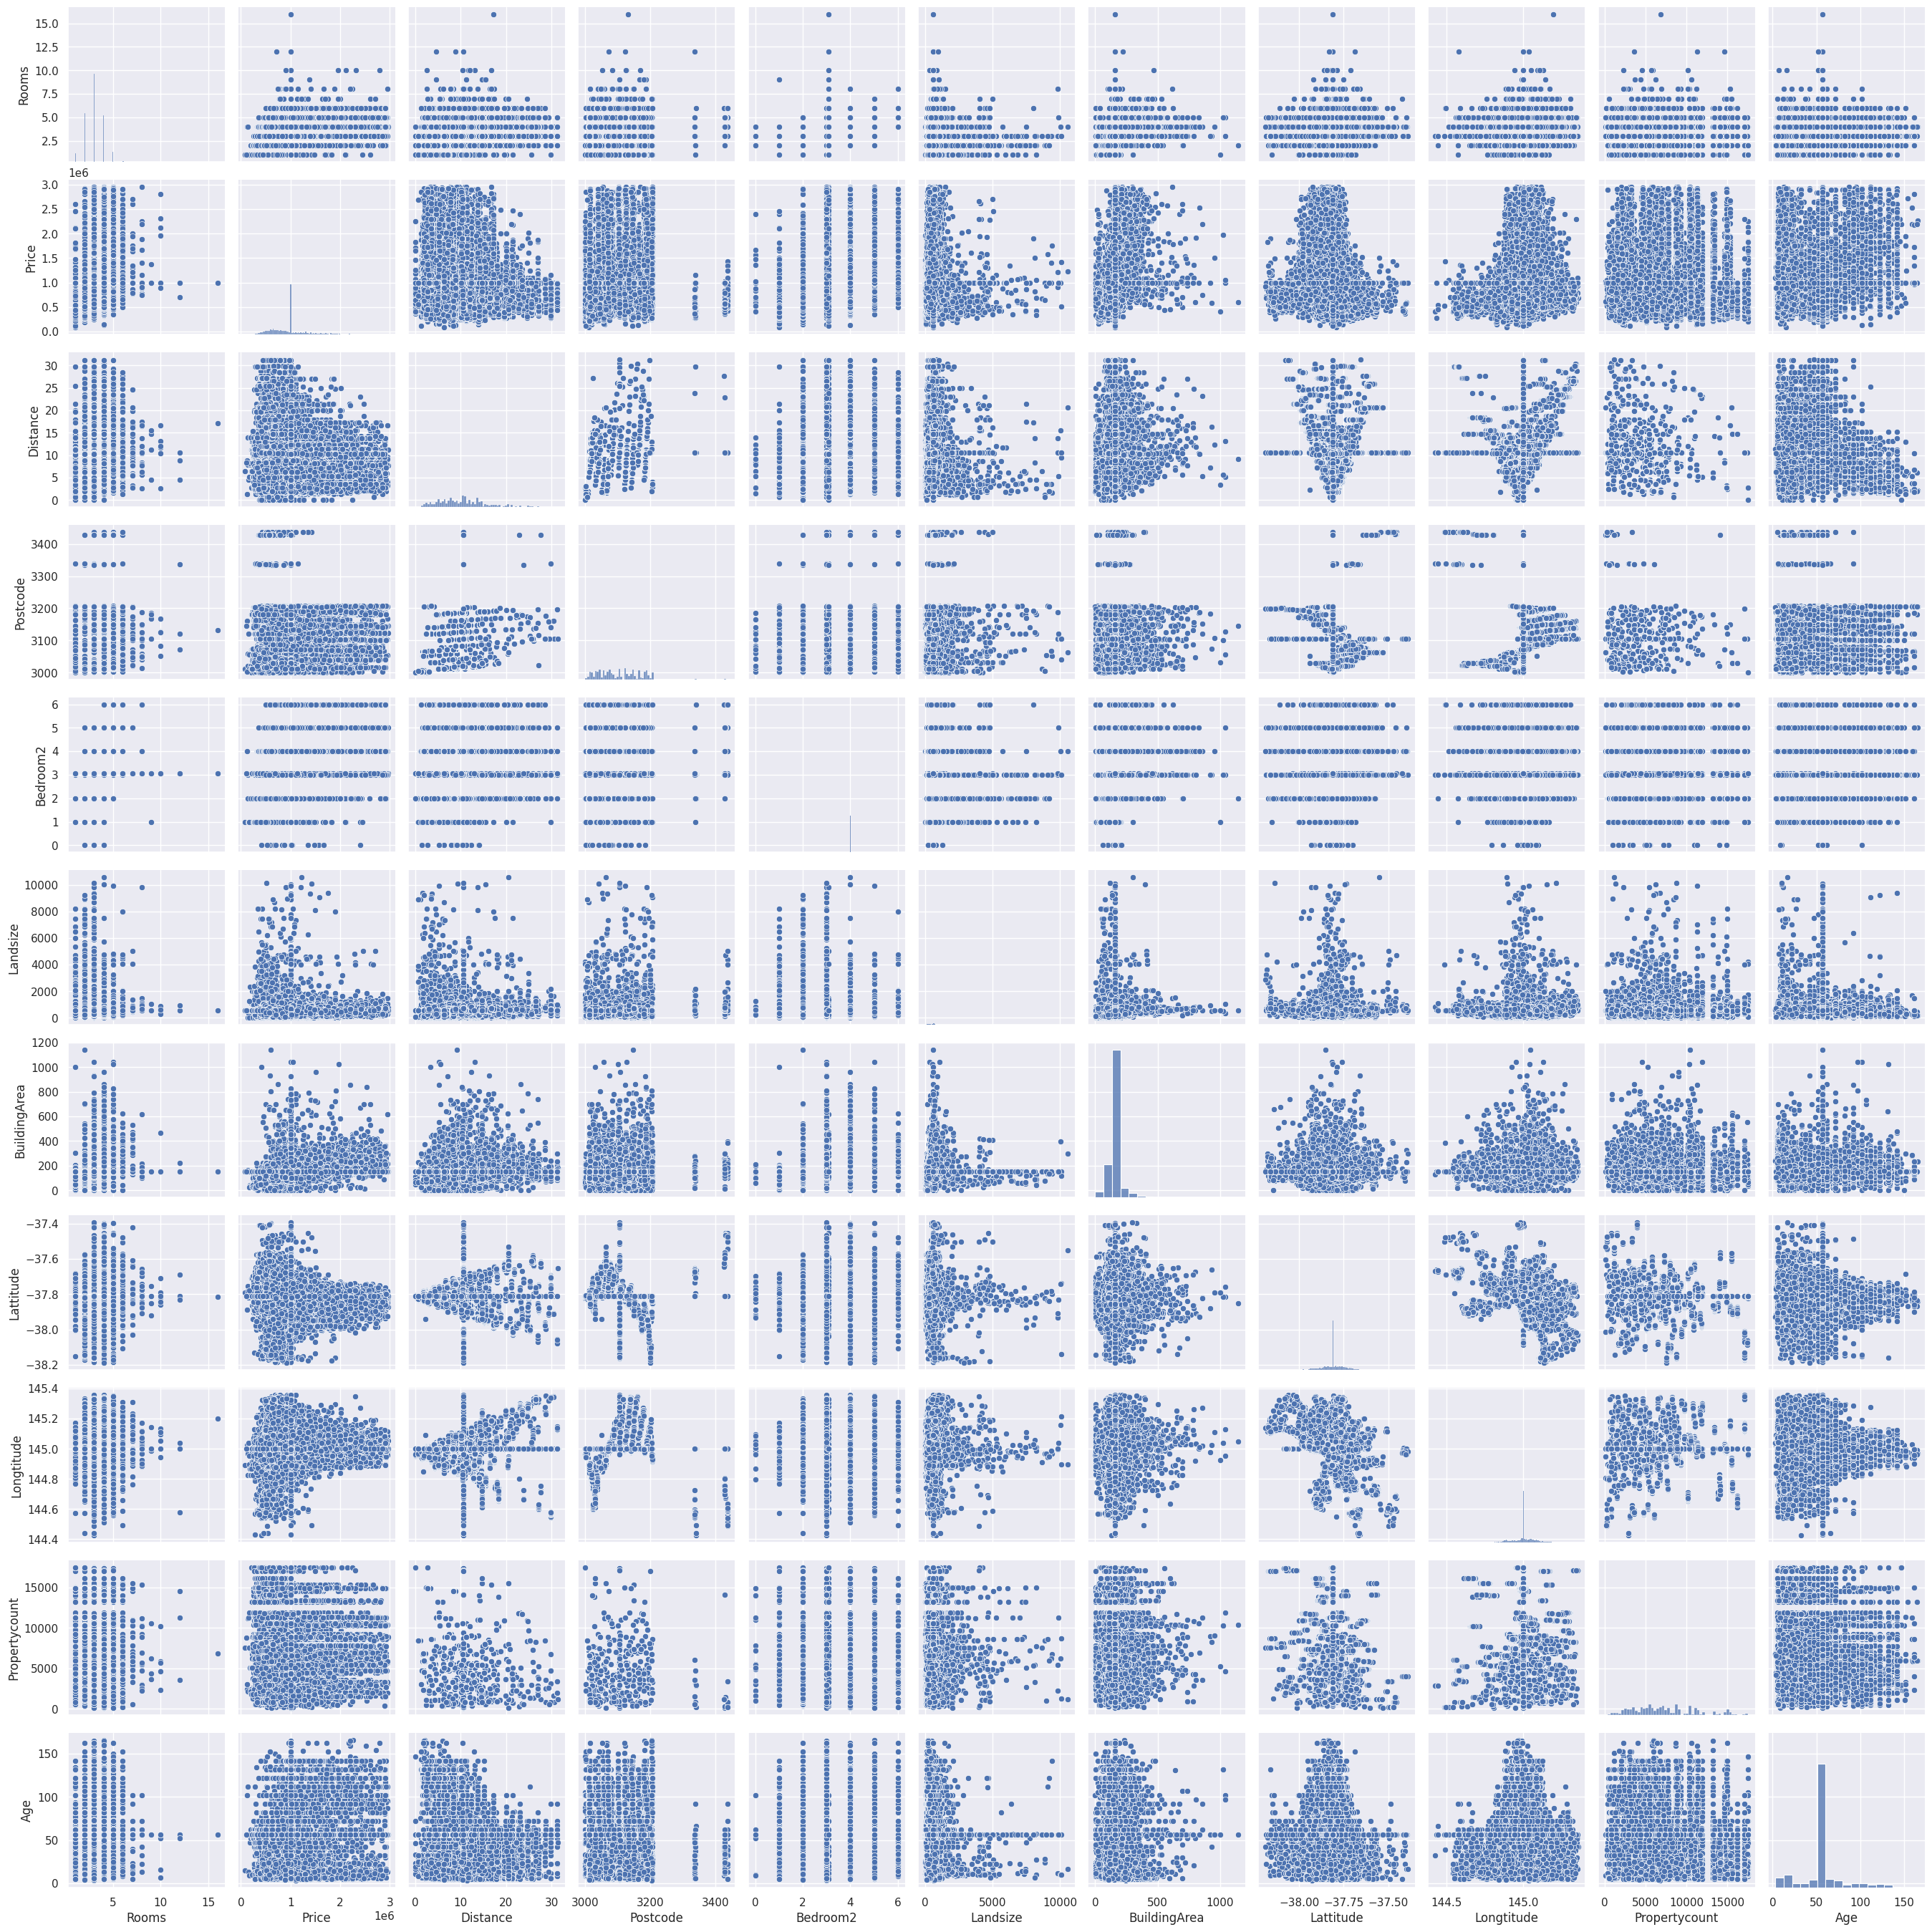

In [ ]:
sns.pairplot(data)

#### Correlation Matrix

<ipython-input-34-24046f37de2c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True)


Text(0.5, 1.0, 'Correlation')

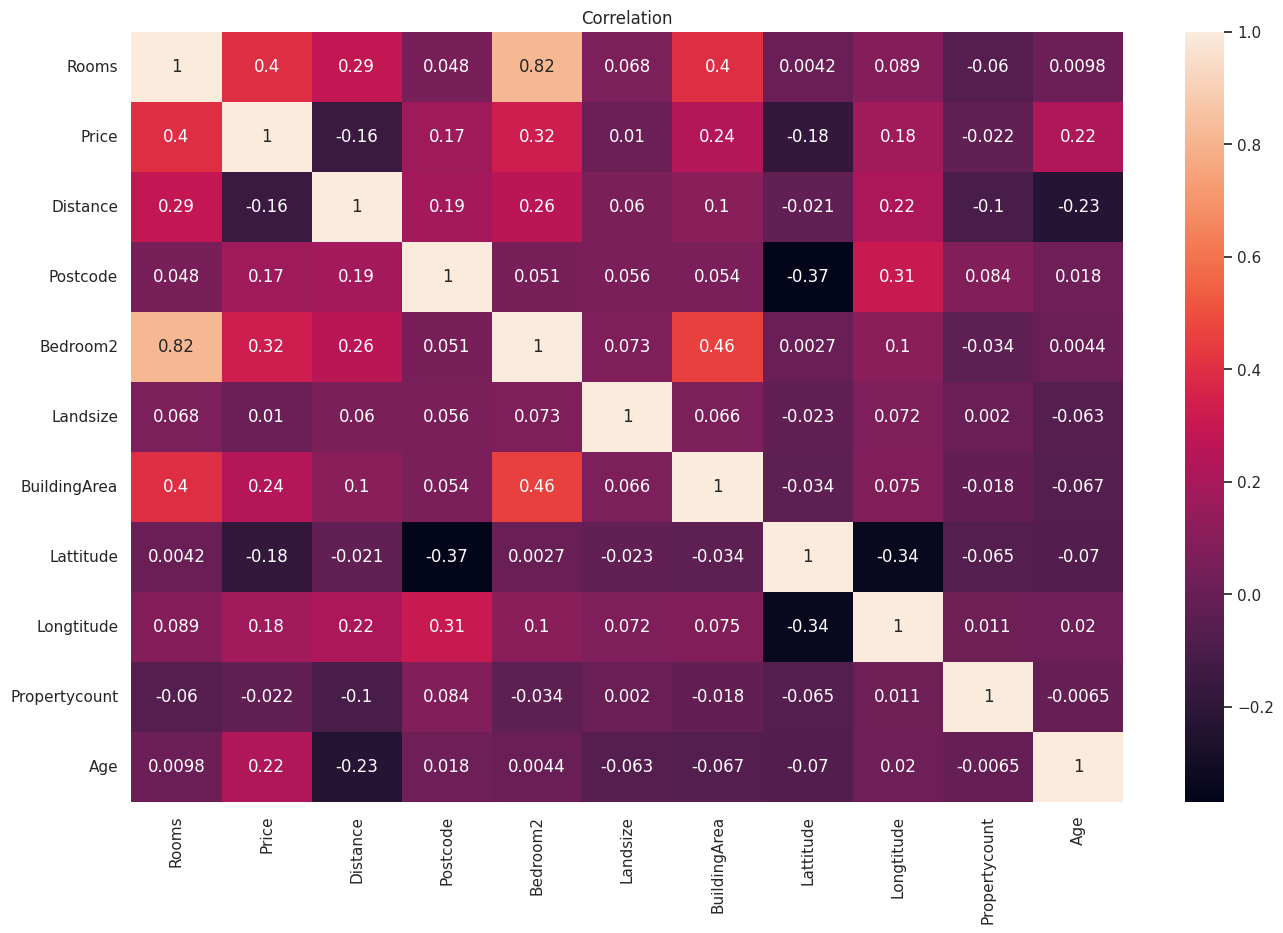

In [ ]:
# Correlation Inspection
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot= True)
plt.title('Correlation')

### Categorical Data vs Numerical Data

In [ ]:
data = data.drop(['Address', 'SellerG','Date'], axis = 1)

In [ ]:
obj_df = data.select_dtypes(include=['category']).copy()
obj_df.head()

Suburb Type Method Bathroom  Car         CouncilArea  \
0  Abbotsford    h     SS      1.0  1.0  Yarra City Council   
1  Abbotsford    h      S      1.0  1.0  Yarra City Council   
2  Abbotsford    h      S      1.0  0.0  Yarra City Council   
3  Abbotsford    u     VB      2.0  1.0  Yarra City Council   
4  Abbotsford    h     SP      2.0  0.0  Yarra City Council   

              Regionname  
0  Northern Metropolitan  
1  Northern Metropolitan  
2  Northern Metropolitan  
3  Northern Metropolitan  
4  Northern Metropolitan

### Types of Data

In [ ]:
obj_df = data.select_dtypes(include=['category']).copy()
obj_df.head()

Suburb Type Method Bathroom  Car         CouncilArea  \
0  Abbotsford    h     SS      1.0  1.0  Yarra City Council   
1  Abbotsford    h      S      1.0  1.0  Yarra City Council   
2  Abbotsford    h      S      1.0  0.0  Yarra City Council   
3  Abbotsford    u     VB      2.0  1.0  Yarra City Council   
4  Abbotsford    h     SP      2.0  0.0  Yarra City Council   

              Regionname  
0  Northern Metropolitan  
1  Northern Metropolitan  
2  Northern Metropolitan  
3  Northern Metropolitan  
4  Northern Metropolitan

### Label Encoder & One-Hot Encoder


In [ ]:
data_encoded = pd.get_dummies(data = obj_df, drop_first= True)
data_encoded

Suburb_Aberfeldie  Suburb_Airport West  Suburb_Albanvale  \
0                      0                    0                 0   
1                      0                    0                 0   
2                      0                    0                 0   
3                      0                    0                 0   
4                      0                    0                 0   
...                  ...                  ...               ...   
34852                  0                    0                 0   
34853                  0                    0                 0   
34854                  0                    0                 0   
34855                  0                    0                 0   
34856                  0                    0                 0   

       Suburb_Albert Park  Suburb_Albion  Suburb_Alphington  Suburb_Altona  \
0                       0              0                  0              0   
1                       0              0                  0              0   
2                       0              0                  0              0   
3                       0              0                  0              0   
4                       0              0                  0              0   
...                   ...            ...                ...            ...   
34852                   0              0                  0              0   
34853                   0              0                  0              0   
34854                   0              0                  0              0   
34855                   0              0                  0              0   
34856                   0              0                  0              0   

       Suburb_Altona Meadows  Suburb_Altona North  Suburb_Ardeer  ...  \
0                          0                    0              0  ...   
1                          0                    0              0  ...   
2                          0                    0              0  ...   
3                          0                    0              0  ...   
4                          0                    0              0  ...   
...                      ...                  ...            ...  ...   
34852                      0                    0              0  ...   
34853                      0                    0              0  ...   
34854                      0                    0              0  ...   
34855                      0                    0              0  ...   
34856                      0                    0              0  ...   

       CouncilArea_Wyndham City Council  CouncilArea_Yarra City Council  \
0                                     0                               1   
1                                     0                               1   
2                                     0                               1   
3                                     0                               1   
4                                     0                               1   
...                                 ...                             ...   
34852                                 0                               0   
34853                                 0                               0   
34854                                 0                               0   
34855                                 0                               0   
34856                                 0                               0   

       CouncilArea_Yarra Ranges Shire Council  Regionname_Eastern Victoria  \
0                                           0                            0   
1                                           0                            0   
2                                           0                            0   
3                                           0                            0   
4                                           0                            0   
...                

In [ ]:
data.drop(['Type','Method','CouncilArea','Regionname','Suburb'], axis = 1, inplace = True)
data.head()

Rooms         Price  Distance  Postcode  Bedroom2 Bathroom  Car  \
0      2  1.000282e+06       2.5    3067.0       2.0      1.0  1.0   
1      2  1.480000e+06       2.5    3067.0       2.0      1.0  1.0   
2      2  1.035000e+06       2.5    3067.0       2.0      1.0  0.0   
3      3  1.000282e+06       2.5    3067.0       3.0      2.0  1.0   
4      3  1.465000e+06       2.5    3067.0       3.0      2.0  0.0   

     Landsize  BuildingArea  Lattitude  Longtitude  Propertycount         Age  
0  126.000000    155.690093   -37.8014    144.9958         4019.0   56.592097  
1  202.000000    155.690093   -37.7996    144.9984         4019.0   56.592097  
2  156.000000     79.000000   -37.8079    144.9934         4019.0  122.000000  
3  577.745745    155.690093   -37.8114    145.0116         4019.0   56.592097  
4  134.000000    150.000000   -37.8093    144.9944         4019.0  122.000000

In [ ]:
data = data.join(data_encoded)
data.head()

Rooms         Price  Distance  Postcode  Bedroom2 Bathroom  Car  \
0      2  1.000282e+06       2.5    3067.0       2.0      1.0  1.0   
1      2  1.480000e+06       2.5    3067.0       2.0      1.0  1.0   
2      2  1.035000e+06       2.5    3067.0       2.0      1.0  0.0   
3      3  1.000282e+06       2.5    3067.0       3.0      2.0  1.0   
4      3  1.465000e+06       2.5    3067.0       3.0      2.0  0.0   

     Landsize  BuildingArea  Lattitude  ...  CouncilArea_Wyndham City Council  \
0  126.000000    155.690093   -37.8014  ...                                 0   
1  202.000000    155.690093   -37.7996  ...                                 0   
2  156.000000     79.000000   -37.8079  ...                                 0   
3  577.745745    155.690093   -37.8114  ...                                 0   
4  134.000000    150.000000   -37.8093  ...                                 0   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  \
0                               1                                       0   
1                               1                                       0   
2                               1                                       0   
3                               1                                       0   
4                               1                                       0   

   Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
0                            0                                 1   
1                            0                                 1   
2                            0                                 1   
3                            0                                 1   
4                            0                                 1   

   Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Regionname_Western Victoria  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 436 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34851 entries, 0 to 34856
Columns: 436 entries, Rooms to Regionname_Western Victoria
dtypes: category(2), float64(10), int64(1), uint8(423)
memory usage: 18.3 MB


## Training The Model

### Splitting the Data Into Features and Label

In [ ]:
data.head()

Rooms         Price  Distance  Postcode  Bedroom2 Bathroom  Car  \
0      2  1.000282e+06       2.5    3067.0       2.0      1.0  1.0   
1      2  1.480000e+06       2.5    3067.0       2.0      1.0  1.0   
2      2  1.035000e+06       2.5    3067.0       2.0      1.0  0.0   
3      3  1.000282e+06       2.5    3067.0       3.0      2.0  1.0   
4      3  1.465000e+06       2.5    3067.0       3.0      2.0  0.0   

     Landsize  BuildingArea  Lattitude  ...  CouncilArea_Wyndham City Council  \
0  126.000000    155.690093   -37.8014  ...                                 0   
1  202.000000    155.690093   -37.7996  ...                                 0   
2  156.000000     79.000000   -37.8079  ...                                 0   
3  577.745745    155.690093   -37.8114  ...                                 0   
4  134.000000    150.000000   -37.8093  ...                                 0   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  \
0                               1                                       0   
1                               1                                       0   
2                               1                                       0   
3                               1                                       0   
4                               1                                       0   

   Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
0                            0                                 1   
1                            0                                 1   
2                            0                                 1   
3                            0                                 1   
4                            0                                 1   

   Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Regionname_Western Victoria  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 436 columns]

In [ ]:
X = data.loc[:, data.columns != 'Price']
X.head()

Rooms  Distance  Postcode  Bedroom2 Bathroom  Car    Landsize  \
0      2       2.5    3067.0       2.0      1.0  1.0  126.000000   
1      2       2.5    3067.0       2.0      1.0  1.0  202.000000   
2      2       2.5    3067.0       2.0      1.0  0.0  156.000000   
3      3       2.5    3067.0       3.0      2.0  1.0  577.745745   
4      3       2.5    3067.0       3.0      2.0  0.0  134.000000   

   BuildingArea  Lattitude  Longtitude  ...  CouncilArea_Wyndham City Council  \
0    155.690093   -37.8014    144.9958  ...                                 0   
1    155.690093   -37.7996    144.9984  ...                                 0   
2     79.000000   -37.8079    144.9934  ...                                 0   
3    155.690093   -37.8114    145.0116  ...                                 0   
4    150.000000   -37.8093    144.9944  ...                                 0   

   CouncilArea_Yarra City Council  CouncilArea_Yarra Ranges Shire Council  \
0                               1                                       0   
1                               1                                       0   
2                               1                                       0   
3                               1                                       0   
4                               1                                       0   

   Regionname_Eastern Victoria  Regionname_Northern Metropolitan  \
0                            0                                 1   
1                            0                                 1   
2                            0                                 1   
3                            0                                 1   
4                            0                                 1   

   Regionname_Northern Victoria  Regionname_South-Eastern Metropolitan  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   Regionname_Southern Metropolitan  Regionname_Western Metropolitan  \
0                                 0                                0   
1                                 0                                0   
2                                 0                                0   
3                                 0                                0   
4                                 0                                0   

   Regionname_Western Victoria  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 435 columns]

In [ ]:
y = data['Price']
y

0        1.000282e+06
1        1.480000e+06
2        1.035000e+06
3        1.000282e+06
4        1.465000e+06
             ...     
34852    1.480000e+06
34853    8.880000e+05
34854    7.050000e+05
34855    1.140000e+06
34856    1.020000e+06
Name: Price, Length: 34851, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
'''
We are splitting our data into train-test in order to increase performance of model training
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

### Using Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
print("Accuracy of train:", clf.score(X_train, y_train))
print("Accuracy of test:", clf.score(X_test, y_test))

Accuracy of train: 0.5345201404287826
Accuracy of test: 0.5251853774866302


#### Make Predictions Via Using Our Model

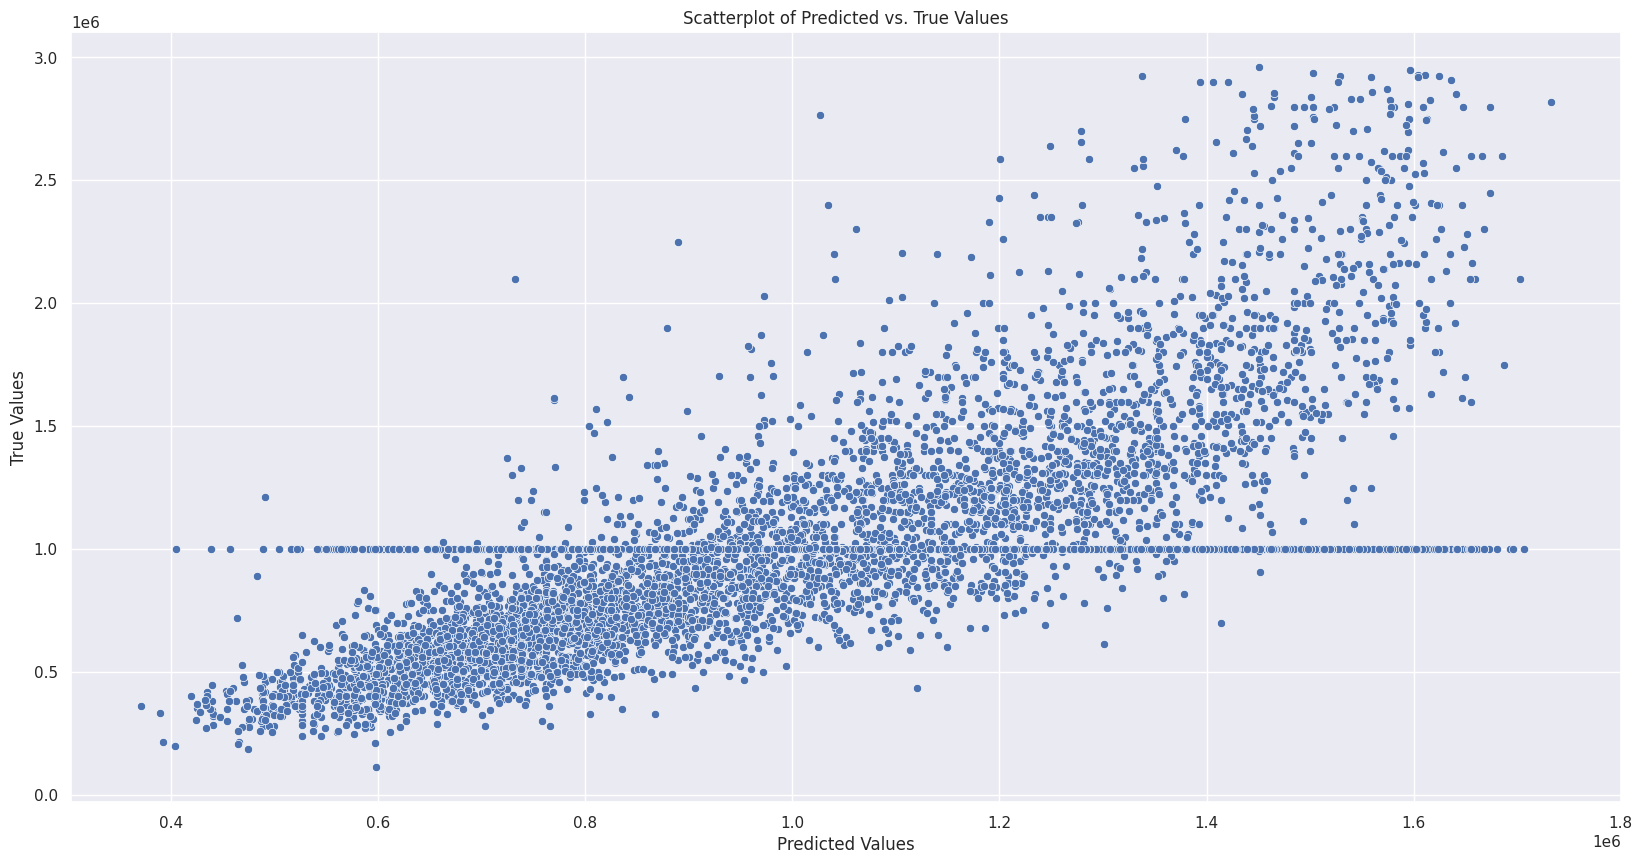

In [ ]:
y_pred = clf.predict(X_test)

fig, axes = plt.subplots()
df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})

# Create a scatterplot using the combined data
sns.scatterplot(data=df, x='y_pred', y='y_test')

# Add labels and customize the plot as needed
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatterplot of Predicted vs. True Values')

# Show the plot
plt.show()

<ipython-input-50-def73f5d5b1e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axes = sns.distplot((y_test - y_pred))


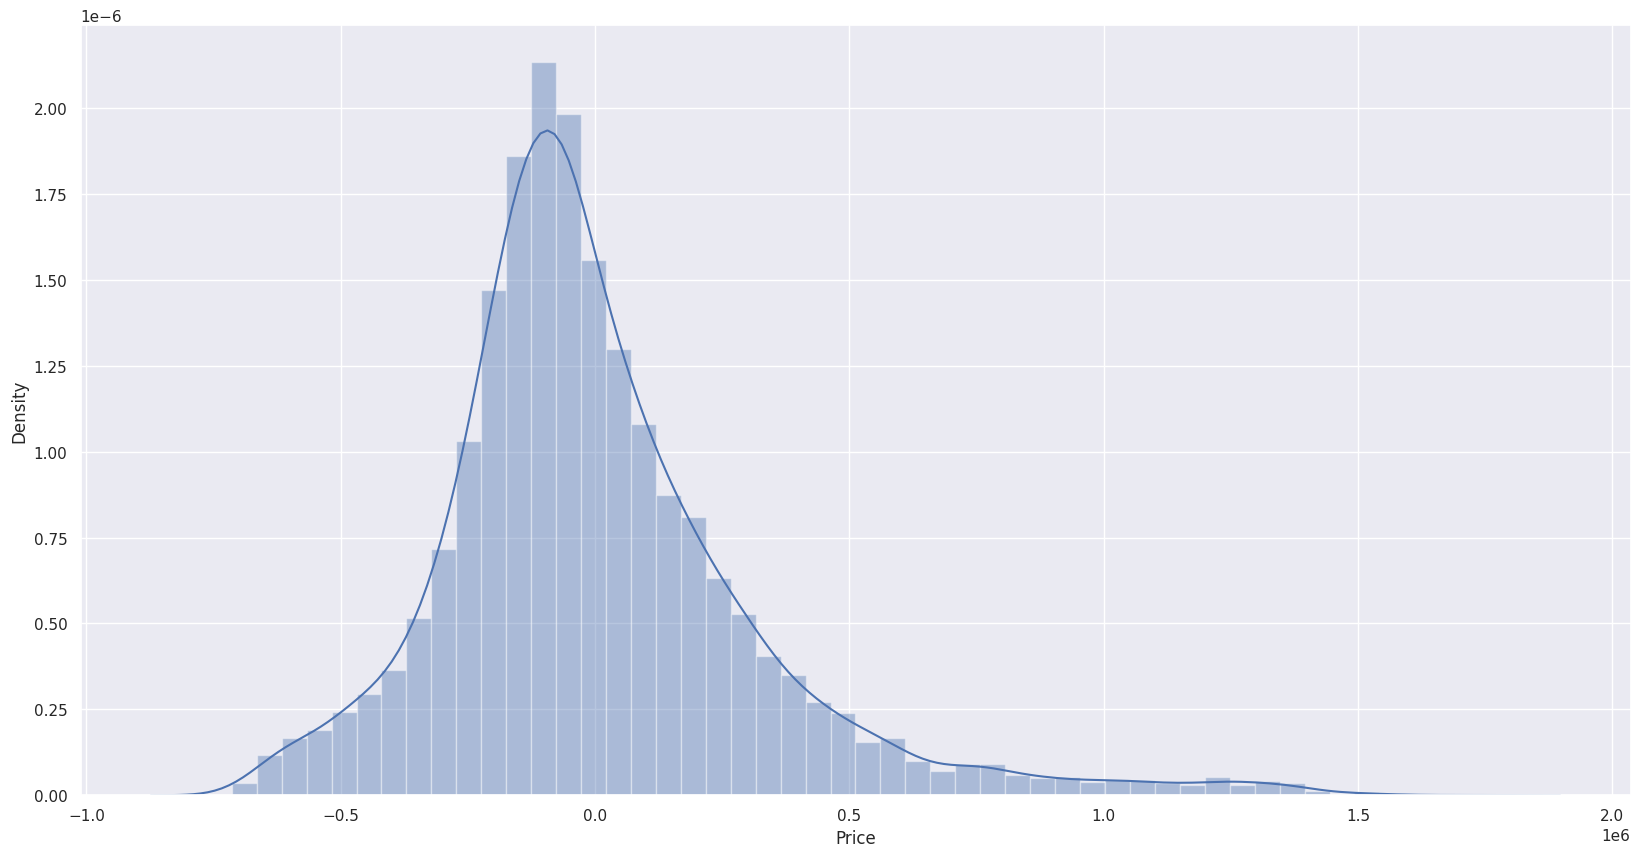

In [ ]:
fig, axes = plt.subplots()
axes = sns.distplot((y_test - y_pred))

### Comparing with other models

In [ ]:
# Imports
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [ ]:
# Models Object
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [ ]:
# Add dictionary attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [ ]:
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e+15, tolerance: 5.522e+11
  model = cd_fast.enet_coordinate_descent(


MAE:  230104.59941887535
MSE:  102464842531.42433
RMSE:  320101.30042132654
R2:  0.4964556037878466


Running  LinearRegression()
MAE:  17796240669.554432
MSE:  2.1377495623615788e+24
RMSE:  1462104497757.1128
R2:  -10505572311809.521


Running  Ridge()
MAE:  230006.545638305
MSE:  102337349792.09404
RMSE:  319902.09407269285
R2:  0.4970821431242811


Running  ElasticNet()
MAE:  266891.45412358636
MSE:  134367514934.71889
RMSE:  366561.7477788959
R2:  0.33967585850160964


Running  KNeighborsRegressor()
MAE:  243307.4686732821
MSE:  123797645782.59569
RMSE:  351848.8962361481
R2:  0.39161951301525466


Running  RandomForestRegressor()
MAE:  198578.5192244155
MSE:  91899930403.63667
RMSE:  303150.01303585107
R2:  0.5483748979280758


Running  GradientBoostingRegressor()
MAE:  222206.91428288358
MSE:  96657454863.33035
RMSE:  310897.82061527926
R2:  0.5249949295180691


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_state=2)
MAE